# **Topic Modeling of COVID-19 Research**

**Capstone Project 3 : Springboard Data Science career track
Notebook by Patrico Tyrell**


## **1. Introduction**

The COVID-19 pandemic has generated an immense volume of scholarly articles, presenting a challenge for researchers and policymakers to stay abreast of evolving trends. This project will apply Natural Language Processing (NLP) techniques for topic modeling and trend analysis to extract valuable insights from the COVID-19 Open Research Dataset (CORD-19).The project aims to clearly defined and interpret topics derived from the scientific literature.


## **2. Data

The project utilized the COVID-19 Open Research Dataset (CORD-19) published on Kaggle. This was prepared by the White House and a coalition of leading research groups. THe CORD-19 is a resource of over 1,000,000 scholarly articles, including over 400,000 with full text, about COVID-19, SARS-CoV-2, and related coronaviruses.

## **3. Methodolgy**

In this research project, the methodology employed a two-fold approach involving Latent Dirichlet Allocation (LDA) and Non-Negative Matrix Factorization (NMF) techniques to extract and interpret topics from the extensive scientific literature on COVID-19. The initial exploration considered both LDA and NMF as potential topic modeling algorithms. The decision to proceed with LDA was based on its inherent interpretability and higher coherence scores observed during preliminary analyses. LDA's capacity to assign meaningful labels to topics and its widespread use in text mining applications made it particularly suitable for the study's goal of clearly defining and interpreting themes from the literature. To optimize the performance of the LDA model, hyperparameter tuning was employed, aiming to enhance coherence and topic distinctiveness. Despite minimal differences in coherence scores before and after hyperparameter tuning, LDA was deemed more suitable for its ability to generate topics that align with the study's objectives and maintain consistency in theme representation. 


## **4. Summary of Findings**

The topics generated through Latent Dirichlet Allocation (LDA) modeling of the scientific literature on COVID-19 offer insight into the extensive body of work produced during the pandemic. These identified topics span a diverse range of themes, including general discussions on COVID-19, the societal impact of the pandemic, patient and disease characteristics, vaccination efforts, and cellular aspects of the virus. The consistency in themes across models, both before and after hyperparameter tuning, underscores the robustness of the topic identification process. These topics provide a structured representation in line with the study's goal of clearly defining and interpreting themes from the literature.

The following general conclusions and implications emerged from the findings:

A. **Diverse Research Themes:** The identified topics encompass a wide array of research themes related to COVID-19, reflecting the diversity within the scientific literature on the subject.

B. **Consistency in Themes:** Despite subtle changes after hyperparameter tuning, the overall themes and keywords within topics remain consistent, indicating the robustness of the identified topics.

C. **Interpretable Topics:** The topics are interpretable and align with the broader context of COVID-19 research, providing valuable insights for researchers and practitioners into different aspects of the pandemic.

D. **Relevance to Study Goals:** Aligned with the study's goal, the identified topics offer a structured representation of key themes in the literature, enhancing understanding of the research landscape.

E. **Implications for Further Analysis:** The topics serve as a foundation for in-depth analysis, including exploration of subtopics, trends over time, and correlations between topics. Researchers can prioritize areas for further investigation based on the prevalence and significance of specific themes.

F. **Communication and Decision-Making:** Insights from the topics are valuable for communicating key findings to diverse audiences, including policymakers, healthcare professionals, and the general public. Understanding prevalent themes is crucial for informed decision-making during the ongoing pandemic and future ones.

G. **Validation and Expert Input:** While LDA models provide automated topic identification, validation by domain experts is essential. Collaboration with subject matter experts ensures that identified topics align with the latest developments and nuances in COVID-19 research.


## **5. Limitations**


The project utilize research abstracts rather than full texts. Using research abstracts for topic modeling has both advantages and disadvantages. Here's a breakdown:

*Pros*:

-Focus on core content: Abstracts are condensed summaries of research, providing a focused view of the main themes and key points. This can lead to clearer topic identification compared to analyzing full texts.

-Efficiency: Abstracts are shorter than full texts, allowing for faster processing and analysis, especially when dealing with large datasets.

-Accessibility: Abstracts are often publicly available, making them a readily accessible data source for research and analysis.

-Standardization: Abstracts often follow specific formatting guidelines, improving the consistency of data and reducing noise compared to diverse full texts.

*Cons*:

-Limited information: Abstracts lack the detail and nuance of full texts. Important information might be omitted, potentially leading to incomplete or inaccurate topic representations.

-Author bias: Abstract writing can be influenced by author bias, potentially skewing the identified topics.

-Missing context: Lack of context from the full text can lead to misinterpretations or misunderstandings of the topics.
Genre-specific differences: Different research fields may have distinct abstract styles, complicating comparisons and generalizability.


## 6. Importing Neccessary Packages

In [77]:
import pandas as pd
from gensim.models import LdaModel
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.matutils import Sparse2Corpus
from scipy.sparse import csc_matrix
from gensim.models.nmf import Nmf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
import gensim
from collections import Counter
import nltk
nltk.download('stopwords')  # Download stop words if needed
from nltk.corpus import stopwords
import re
from sklearn.metrics import silhouette_score
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


## 7. Load Gensim dictionary and corpus for abstracts

In [76]:
# Load the saved Gensim dictionary and corpus for abstracts
gensim_dict_abstract = gensim.corpora.Dictionary.load("gensim_dictionary_abstract.dict")
gensim_corpus_abstract = gensim.corpora.MmCorpus("gensim_corpus_abstract.mm")

## 8. Applying Natural Language Processing Techniques

The two Natural Language Processing Techniques used in this project were:

**Latent Dirichlet Allocation (LDA)**: Latent Dirichlet Allocation (LDA) is a generative probabilistic model used for topic modeling, a technique in natural language processing and machine learning that identifies topics within a collection of text documents. LDA assumes that documents are mixtures of topics and that each topic is characterized by a distribution of words. The model aims to uncover these latent topics based on the observed words in the documents.

**Non-Negative Matrix Factorization**:Non-Negative Matrix Factorization (NMF) is a dimensionality reduction and matrix factorization technique that is particularly useful for analyzing non-negative data. NMF factorizes a given matrix into two lower-dimensional matrices, both of which have non-negative values. This non-negativity constraint makes NMF suitable for applications where the input data has a natural non-negative structure, such as image processing, text mining, and audio signal processing.

    

In [ ]:
### 8a. Latent Dirichlet Allocation (LDA)

In [69]:
# Specifying the desired number of topics
num_topics = 10

# Set a random state for reproducibility
random_state = 42 

# Train Gensim's LDA model with the random_state parameter
lda_model = LdaModel(corpus=gensim_corpus_abstract, id2word=gensim_dict_abstract, num_topics=num_topics, random_state=random_state)

# Prepare the pyLDAvis visualization
pyLDAvis_data = gensimvis.prepare(lda_model, gensim_corpus_abstract, gensim_dict_abstract)
pyLDAvis.display(pyLDAvis_data)



Based on visual observations: There apprears to be well-separated circles which indicate distinct topics with unique word distributions. Topics 7 and 6, being less separated, might share some common themes or vocabulary. Dominant Topics: Larger circles (topics 1, 2, and 3) suggest a higher prevalence of documents that heavily feature those topics' words.These topics might represent central themes or research areas within your dataset.

In [71]:
# Examine top 10 words for topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.031*"patient" + 0.020*"covid" + 0.009*"studi" + 0.007*"sever" + 0.007*"hospit" + 0.006*"diseas" + 0.006*"risk" + 0.006*"associ" + 0.006*"clinic" + 0.005*"result"')
(1, '0.018*"patient" + 0.013*"covid" + 0.011*"cov" + 0.011*"sar" + 0.009*"infect" + 0.007*"diseas" + 0.007*"studi" + 0.006*"coronaviru" + 0.006*"case" + 0.004*"treatment"')
(2, '0.010*"patient" + 0.009*"covid" + 0.007*"sar" + 0.007*"cell" + 0.006*"diseas" + 0.006*"cov" + 0.004*"clinic" + 0.004*"method" + 0.004*"test" + 0.004*"studi"')
(3, '0.009*"intervent" + 0.009*"effect" + 0.008*"covid" + 0.008*"studi" + 0.007*"de" + 0.005*"la" + 0.005*"citat" + 0.005*"increas" + 0.005*"includ" + 0.004*"model"')
(4, '0.010*"vaccin" + 0.009*"studi" + 0.008*"effect" + 0.005*"control" + 0.005*"treatment" + 0.005*"covid" + 0.005*"group" + 0.004*"diseas" + 0.004*"result" + 0.004*"develop"')
(5, '0.024*"sar" + 0.022*"cov" + 0.012*"cell" + 0.009*"protein" + 0.009*"antibodi" + 0.007*"structur" + 0.006*"human" + 0.006*"bind" + 0.006*"studi"

Based on the top 10 words for each topic identified by LDA, we can get a glimpse into the main thematic clusters within your corpus:

**Topic 0 and 1** (0.031"patient", 0.018"patient"):** These seem heavily focused on clinical aspects of COVID-19, with words like "patient," "covid," "severe," "hospital," and "disease" suggesting research on patient outcomes, disease characteristics, and potentially risk factors.

**Topic 2** (0.010"patient", 0.007"cell"):** This topic likely delves into cellular and molecular mechanisms related to COVID-19, with words like "cell," "sar," "disease," and "method" hinting at studies exploring viral interactions, pathogenesis, or potential therapeutic targets.

**Topic 3** (0.009"intervent")* focuses on intervention strategies and their effects, featuring words like "intervention," "effect," "covid," "study," and "model" suggesting research on treatment efficacy, preventive measures, or modeling approaches.

**Topic 4** (0.010"vaccin")* clearly revolves around vaccine development and evaluation, with words like "vaccine," "study," "effect," "control," and "treatment" implying research on vaccine effectiveness, comparison studies, and potential therapeutic applications.

**Topic 5** (0.024"sar")* seems centered on SARS-CoV-2 structure and viral interaction, with terms like "sar," "cov," "cell," "protein," "antibody," and "structure" suggesting investigations into viral proteins, binding mechanisms, and potential targets for antiviral development.

**Topic 6** (0.013"model")* appears to be about modeling and data-driven approaches in COVID-19 research, with words like "model," "data," "study," "research," and "method" indicating studies employing predictive models, data analysis techniques, or algorithmic development.

**Topic 7** (0.015"infect")* highlights viral infection and immune response, with words like "infect," "cov," "cell," "vaccine," "immun," and "virus" suggesting research on infection mechanisms, viral entry points, and the role of the immune system in response to COVID-19.

**Topic 8** (0.016"health")* addresses the broader public health and social impacts of the pandemic, with words like "health," "covid," "pandemic," "social," "care," and "mental" suggesting research on healthcare systems, pandemic management, social distancing measures, and mental health concerns during COVID-19.

**Topic 9** (0.012"studi")* appears to be a catch-all for general COVID-19 research, focusing on studies and their results, with words like "study," "test," "group," "result," "patient," and "model" suggesting a variety of research areas involving patient populations, testing methodologies, and statistical analysis

**Evaluation of LDA Abstract**

In [14]:
import gensim
from gensim.models import CoherenceModel

# Calculate perplexity
perplexity = lda_model.log_perplexity(gensim_corpus_abstract)
print('\nPerplexity:', perplexity)




Perplexity: -7.487788675650914


Doing an intial check of perplexity indicated a good perplexity score. With a value of -7.4878, the model seems to be performing quite well in terms of predicting unseen data within the corpus. This suggests a good fit between the number of topics chosen (10) and the underlying structure of the data.

In [48]:
#  Creating a function to explore different topic numbers and evaluating their perplexity scores to finding the optimal model.
def explore_topic_numbers(corpus, dictionary, topic_range, coherence_measure=None):
    results = {}
    for num_topics in topic_range:
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        perplexity = model.log_perplexity(corpus)
        results[num_topics] = {'perplexity': perplexity}

        if coherence_measure:
            coherence_model = CoherenceModel(model=model, corpus=corpus, texts=corpus, dictionary=dictionary, coherence=coherence_measure)
            coherence = coherence_model.get_coherence()
            results[num_topics]['coherence'] = coherence

    return results


In [116]:
# perplexity and coherence for different number of topics
topic_results = explore_topic_numbers(gensim_corpus_abstract, gensim_dict_abstract, topic_range=[5, 8, 10, 12, 15], coherence_measure='u_mass')
print(topic_results)


{5: {'perplexity': -7.639905055810709, 'coherence': -1.349884737503443}, 8: {'perplexity': -7.716630068433045, 'coherence': -1.4718100815922188}, 10: {'perplexity': -7.7588412443824355, 'coherence': -1.5277347162189452}, 12: {'perplexity': -7.821913704178639, 'coherence': -1.6137719129533246}, 15: {'perplexity': -7.905754769963031, 'coherence': -1.7179439254571505}}


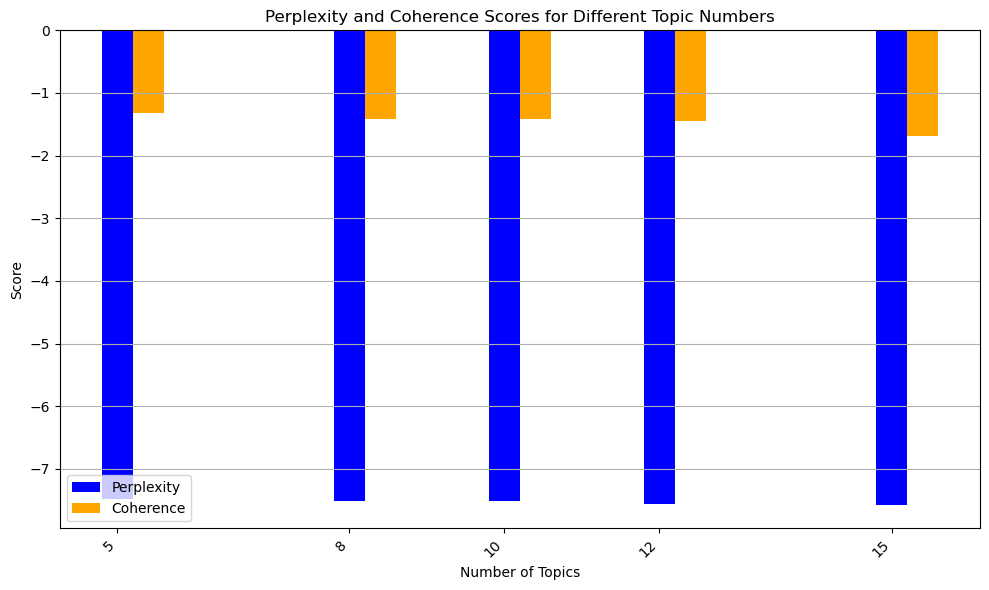

In [27]:
# Extract data from your results dictionary
topic_numbers = list(topic_results.keys())
perplexity_scores = [topic_results[topic]['perplexity'] for topic in topic_numbers]
coherence_scores = [topic_results[topic]['coherence'] for topic in topic_numbers]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar width
bar_width = 0.4

# Plot perplexity bars in blue
ax.bar(topic_numbers, perplexity_scores, color='blue', width=bar_width, label='Perplexity')

# Offset coherence bars to the right by bar_width
ax.bar([topic + bar_width for topic in topic_numbers], coherence_scores, color='orange', width=bar_width, label='Coherence')

# Set labels and title
ax.set_xlabel('Number of Topics')
ax.set_ylabel('Score')
ax.set_title('Perplexity and Coherence Scores for Different Topic Numbers')
ax.legend()

# Customize grid and ticks
ax.grid(axis='y')
plt.xticks(topic_numbers)

# Rotate x-axis labels if needed for readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



Lower perplexity generally indicates a better model fit, as it means the model is better at predicting unseen data.
Higher coherence values generally suggest more semantically coherent topics, where words within a topic are more closely related.
Based on the results, perplexity generally improves (decreases) as the number of topics increases.Coherence, however, doesn't follow a consistent pattern. It's highest for 5 topics, but then declines with 8 and 10 topics before increasing slightly with 12 and 15 topics. While 15 topics have the lowest perplexity, its coherence score is relatively low compared to 5 and 12 topics. 5 topics have the highest coherence score, but its perplexity is not as good as models with more topics. 12 topics offer a balance of relatively good perplexity and coherence scores.
Recommendations:

Since I am more interested in interpretability, I prefer to use 5 topics as it has the highest coherence socre. The Higher coherence suggests more human-interpretable topics.

In [72]:
# Exploring 5 topics
num_topics = 5

# Set a random state for reproducibility
random_state = 40

# Train Gensim's LDA model with the random_state parameter
lda_model = LdaModel(corpus=gensim_corpus_abstract, id2word=gensim_dict_abstract, num_topics=num_topics, random_state=random_state)

# Prepare the pyLDAvis visualization
pyLDAvis_data = gensimvis.prepare(lda_model, gensim_corpus_abstract, gensim_dict_abstract)
pyLDAvis.display(pyLDAvis_data)  # Interactive visualization


In [73]:
# Examine top 10 words for 5 topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.019*"patient" + 0.017*"covid" + 0.009*"studi" + 0.007*"sar" + 0.006*"sever" + 0.006*"infect" + 0.006*"diseas" + 0.005*"result" + 0.005*"cov" + 0.005*"pandem"')
(1, '0.015*"patient" + 0.012*"covid" + 0.010*"infect" + 0.008*"studi" + 0.008*"diseas" + 0.006*"associ" + 0.005*"cov" + 0.005*"health" + 0.005*"result" + 0.004*"sar"')
(2, '0.008*"cell" + 0.008*"studi" + 0.006*"protein" + 0.005*"develop" + 0.005*"research" + 0.005*"model" + 0.005*"base" + 0.005*"cov" + 0.005*"result" + 0.004*"data"')
(3, '0.013*"cov" + 0.012*"sar" + 0.012*"covid" + 0.008*"vaccin" + 0.007*"effect" + 0.006*"pandem" + 0.005*"result" + 0.005*"diseas" + 0.005*"base" + 0.005*"model"')
(4, '0.012*"health" + 0.012*"covid" + 0.009*"patient" + 0.009*"studi" + 0.007*"risk" + 0.006*"pandem" + 0.006*"care" + 0.005*"effect" + 0.005*"vaccin" + 0.004*"factor"')


### 8b. Non-Negative Matrix Factorization (NMF)

In [138]:
# Read clean data
pandemic_publications_nomissing = pd.read_csv('pandemic_publications_nomissing.csv')

# Expanded stop word list
stop_words = set(stopwords.words('english'))
stop_words.update(['de', 'int', 'el', '2021', '2022', '2020', '2019',
                    'yang', 'gonzález', 'wang', 'citat', 'int', 'gonzález', 'di', 'liu', 'van', 'sánchez', 'pérez', 'el', '3390', 'sci',
                    'zhao', 'lópez', 'garcía'])

def filter_words(text):
    if isinstance(text, str):
        filtered_words = [word for word in text.split() if word not in stop_words and not re.match(r"\d+", word)]  # Filter stop words and numbers
        return ' '.join(filtered_words)
    else:
        return text  # Return unchanged if not a string

# Remove rare words
word_counts = Counter()
for abstract in pandemic_publications_nomissing['cleaned_abstract'].apply(filter_words):  # Apply filtering here
    if isinstance(abstract, str):
        word_counts.update(abstract.split())
    else:
        print(f"Skipping non-string value: {abstract}")

min_frequency = 10 
frequent_words = [word for word, count in word_counts.items() if count >= min_frequency]

# Apply filtering to abstracts
pandemic_publications_nomissing['filtered_abstract'] = pandemic_publications_nomissing['cleaned_abstract'].apply(filter_words)

# Preprocess and save files for filtered_abstract
non_empty_abstracts = pandemic_publications_nomissing['filtered_abstract'].dropna().tolist()

# Create a CountVectorizer with max_features as needed
vectorizer_abstract = CountVectorizer(max_features=10000)
dtm_abstract = vectorizer_abstract.fit_transform(non_empty_abstracts)

# Normalize the document-term matrix for NMF
dtm_abstract_normalized = normalize(dtm_abstract)

# Perform NMF modeling
num_topics = 5 
nmf_model_abstract = NMF(n_components=num_topics, random_state=42)
nmf_model_abstract.fit(dtm_abstract_normalized)


# Get the topic-word matrix
topic_word_matrix_abstract = nmf_model_abstract.components_

# Convert topics to token indices
topic_ids_abstract = [[word for word in topic] for topic in topic_word_matrix_abstract]

# Create a Gensim dictionary from your documents
gensim_dict_abstract = gensim.corpora.Dictionary([vectorizer_abstract.get_feature_names_out()])

Skipping non-string value: nan
Skipping non-string value: nan


In [92]:
# Get the feature names from the vectorizer
feature_names_abstract = vectorizer_abstract.get_feature_names_out()

# Display the top words for each topic
num_top_words = 10  # Adjust as needed

for topic_idx, topic in enumerate(nmf_model_abstract.components_):
    print(f"Topic #{topic_idx + 1}:")
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names_abstract[i] for i in top_words_idx]
    print(top_words)
    print()


Topic #1:
['studi', 'health', 'model', 'result', 'data', 'effect', 'research', 'base', 'use', 'method']

Topic #2:
['cov', 'sar', 'infect', 'cell', 'protein', 'viral', 'coronaviru', 'viru', 'sever', 'respiratori']

Topic #3:
['patient', 'hospit', 'clinic', 'studi', 'treatment', 'care', 'sever', 'outcom', 'group', 'associ']

Topic #4:
['covid', 'pandem', 'diseas', 'coronaviru', 'case', 'sever', 'risk', 'report', 'infect', 'symptom']

Topic #5:
['vaccin', 'immun', 'effect', 'respons', 'dose', 'develop', 'antibodi', 'mrna', 'receiv', 'influenza']



Topic Summaries:
**Topic 1**: Focusing on healthcare systems, research, and data-driven approaches to address the pandemic. Includes studies, modeling, and development of methods related to healthcare provision and analysis.

**Topic 2**: Deeply delving into the biological aspects of the virus, particularly cellular, protein, and viral mechanisms. Covers infection, severe respiratory disease, and potential causes or targets for interventions.

**Topic 3**: Zooming in on patient experiences and clinical aspects. This theme explores treatment, outcomes, risk factors, and comparisons between groups, highlighting patient perspectives and healthcare settings.

**Topic 4**: Discussing the broader impacts of the pandemic, encompassing case reports, disease spread, societal effects, and health consequences. Addresses concerns like severity, risk, symptoms, and global implications.

**Topic 5**: Primarily investigating vaccination, immune responses, and protective measures. Covers vaccine development, effectiveness, dosage, safety concerns, and societal factors like hesitancy and accessibility.

**Evaluation of  Non-Negative Matrix Factorization**

In [99]:
def evaluate_nmf_topic_numbers(dtm, feature_names, topic_nums):
    silhouette_scores = []
    avg_coherence_scores = []

    # Create a Gensim dictionary from the feature names
    gensim_dict = gensim.corpora.Dictionary([feature_names])

    # Convert the document-term matrix to Gensim corpus format
    gensim_corpus = gensim.matutils.Sparse2Corpus(dtm.T)

    for num_topics in topic_nums:
        # Train NMF model
        nmf_model = NMF(n_components=num_topics, random_state=42)
        nmf_W = nmf_model.fit_transform(dtm)

        # Get top words for each topic
        top_words_per_topic = []
        for topic in nmf_model.components_:
            top_words_idx = topic.argsort()[:-min(10, len(topic)) - 1:-1]
            top_words = [feature_names[i] for i in top_words_idx]
            top_words_per_topic.append(top_words)

        # Check if top_words_per_topic is empty
        if not any(top_words_per_topic):
            avg_coherence_scores.append(None)
            silhouette_scores.append(None)
            print(f"Number of Topics: {num_topics}, Silhouette Score: None, Average Coherence Score: None (Insufficient words in topics)")
            continue

        # Compute silhouette score
        silhouette = silhouette_score(dtm, labels=nmf_W.argmax(axis=1))
        silhouette_scores.append(silhouette)

        # Compute coherence scores using 'u_mass'
        coherence_model = CoherenceModel(topics=top_words_per_topic, corpus=gensim_corpus, dictionary=gensim_dict, coherence='u_mass')
        coherence_scores = coherence_model.get_coherence_per_topic()
        
        # Calculate average coherence score
        avg_coherence = sum(coherence_scores) / len(coherence_scores)
        avg_coherence_scores.append(avg_coherence)

        print(f"Number of Topics: {num_topics}, Silhouette Score: {silhouette}, Average Coherence Score: {avg_coherence}")

    return silhouette_scores, avg_coherence_scores

# Assuming dtm_abstract is your document-term matrix obtained from NMF
# Assuming feature_names_abstract is your list of feature names obtained from the vectorizer
topic_numbers_to_try = [5, 8, 10, 12, 15]
silhouette_scores, avg_coherence_scores = evaluate_nmf_topic_numbers(dtm_abstract, feature_names_abstract, topic_numbers_to_try)


Number of Topics: 5, Silhouette Score: -0.0037319006244506993, Average Coherence Score: -1.4035459678980893
Number of Topics: 8, Silhouette Score: -0.033213316056906424, Average Coherence Score: -1.67382171037627
Number of Topics: 10, Silhouette Score: -0.0363860294421402, Average Coherence Score: -1.9010975253126734
Number of Topics: 12, Silhouette Score: -0.04903249350597509, Average Coherence Score: -1.7037588471126046
Number of Topics: 15, Silhouette Score: -0.0370941622236317, Average Coherence Score: -1.7665292326594721


Silhouette Score: Generally decreases with more topics, suggesting worse clustering.
Coherence Score: Doesn't follow a consistent pattern, but remains negative for all topics, indicating incoherent topics.
Trade-offs:

Higher number of topics may improve silhouette score (clustering) but worsen coherence (topic interpretability).

### 9. Model Comparison

In [119]:
# Create a DataFrame with the scores
data = {
    'Number of Topics': [5, 8, 10, 12, 15],
    'Silhouette Score (NMF)': [-0.0037319006244506993,-0.033213316056906424,-0.0363860294421402,-0.04903249350597509,-0.0370941622236317 ],  # Replace with actual scores
    'Average Coherence Score (NMF)': [-1.4035459678980893,-1.67382171037627,-1.9010975253126734,-1.7037588471126046,-1.7665292326594721],
    'Perplexity (LDA)': [topic_results[num_topics]['perplexity'] for num_topics in topic_numbers_to_try],
    'Coherence (LDA)': [topic_results[num_topics]['coherence'] for num_topics in topic_numbers_to_try]
}

df = pd.DataFrame(data)

df


,Number of Topics,Silhouette Score (NMF),Average Coherence Score (NMF),Perplexity (LDA),Coherence (LDA)
0,5,-0.003732,-1.403546,-7.639905,-1.349885
1,8,-0.033213,-1.673822,-7.716630,-1.471810
2,10,-0.036386,-1.901098,-7.758841,-1.527735
3,12,-0.049032,-1.703759,-7.821914,-1.613772
4,15,-0.037094,-1.766529,-7.905755,-1.717944


LDA would be a better choice than NMF since interpretability is the primary focus. LDA consistently produced higher coherence scores than NMF for all numbers of topics, indicating more coherent and interpretable topics. Better Theoretical Foundation: LDA is grounded in a probabilistic model, providing a stronger theoretical framework for topic modeling. LDA can capture documents that belong to multiple topics, which NMF struggles with. Additionally, NMF's coherence scores were consistently lower, suggesting less semantically meaningful topics.

In [ ]:
### 10. Hyperparameter Tuning for LDA

In [134]:
# Tokenizing list of documents
tokenized_documents = [list(map(str, doc.split())) for doc in non_empty_abstracts]

# Create a Gensim dictionary
gensim_dict_abstract = gensim.corpora.Dictionary(tokenized_documents)

# Convert documents to bag-of-words format using the Gensim dictionary
gensim_corpus_abstract = [gensim_dict_abstract.doc2bow(doc) for doc in tokenized_documents]

# Convert gensim_corpus_abstract to a list of lists
corpus_list_of_lists = [list(doc) for doc in gensim_corpus_abstract]

# Hyperparameter ranges
alpha_range = [0.01, 0.1, 0.5, 1.0]
beta_range = [0.01, 0.05, 0.1]

# Initial values for best_coherence
best_coherence = -1
best_alpha = None
best_beta = None

for alpha in alpha_range:
    for beta in beta_range:
        lda_model = LdaModel(corpus=gensim_corpus_abstract, id2word=gensim_dict_abstract, num_topics=5, alpha=alpha, eta=beta, random_state=40)

        # Calculate coherence using CoherenceModel
        coherence_model = CoherenceModel(model=lda_model, corpus=gensim_corpus_abstract, texts=tokenized_documents, dictionary=gensim_dict_abstract, coherence='u_mass')
        coherence = coherence_model.get_coherence()

        # Update best values if the current coherence is better
        if coherence > best_coherence:
            best_coherence = coherence
            best_alpha = alpha
            best_beta = beta

# Train the final model with optimal hyperparameters
optimal_lda_model = LdaModel(corpus=gensim_corpus_abstract, id2word=gensim_dict_abstract, num_topics=5, alpha=best_alpha, eta=best_beta, random_state=40)


In [135]:
from gensim.models import CoherenceModel

# Calculate coherence for the optimal LDA model
optimal_coherence_model = CoherenceModel(
    model=optimal_lda_model,
    corpus=gensim_corpus_abstract,
    texts=gensim_corpus_abstract,
    dictionary=gensim_dict_abstract,
    coherence='u_mass'
)

optimal_coherence = optimal_coherence_model.get_coherence()

print(f"Optimal Coherence Score: {optimal_coherence}")



Optimal Coherence Score: -1.3502021474012216


In [130]:
# Prepare the pyLDAvis visualization
pyLDAvis_optimal_lda = gensimvis.prepare(optimal_lda_model, gensim_corpus_abstract, gensim_dict_abstract)
pyLDAvis.display(pyLDAvis_optimal_lda)

Since the coherence scores before and after hyperparameter tuning is very small. I decided to assess the topics generated by the model qualitatively. Examining the top words for each topic to see if they make sense and are interpretable. 

In [136]:
# Examine top 10 words for 5 topics before hypertuning
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.009*"covid" + 0.008*"model" + 0.006*"method" + 0.006*"data" + 0.006*"studi" + 0.005*"base" + 0.005*"result" + 0.005*"time" + 0.005*"patient" + 0.004*"perform"')
(1, '0.010*"covid" + 0.009*"studi" + 0.007*"pandem" + 0.006*"result" + 0.005*"social" + 0.005*"health" + 0.005*"student" + 0.004*"effect" + 0.004*"model" + 0.004*"care"')
(2, '0.025*"patient" + 0.021*"covid" + 0.012*"cov" + 0.009*"sar" + 0.009*"studi" + 0.008*"infect" + 0.007*"diseas" + 0.007*"sever" + 0.005*"risk" + 0.005*"hospit"')
(3, '0.012*"vaccin" + 0.012*"health" + 0.008*"studi" + 0.007*"covid" + 0.005*"effect" + 0.005*"research" + 0.005*"pandem" + 0.004*"infect" + 0.004*"result" + 0.004*"cov"')
(4, '0.009*"cell" + 0.009*"sar" + 0.007*"patient" + 0.007*"studi" + 0.006*"infect" + 0.006*"diseas" + 0.006*"protein" + 0.006*"cov" + 0.004*"effect" + 0.004*"covid"')


In [137]:
# Examine top 10 words for 5 topics after hypertuning
topics = optimal_lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.009*"model" + 0.007*"covid" + 0.007*"method" + 0.006*"data" + 0.006*"base" + 0.005*"studi" + 0.005*"result" + 0.005*"time" + 0.004*"perform" + 0.004*"effect"')
(1, '0.010*"covid" + 0.009*"studi" + 0.008*"pandem" + 0.006*"result" + 0.005*"health" + 0.005*"social" + 0.005*"student" + 0.004*"effect" + 0.004*"care" + 0.004*"model"')
(2, '0.025*"patient" + 0.021*"covid" + 0.011*"cov" + 0.009*"sar" + 0.009*"studi" + 0.008*"infect" + 0.007*"diseas" + 0.007*"sever" + 0.005*"risk" + 0.005*"associ"')
(3, '0.013*"vaccin" + 0.012*"health" + 0.007*"studi" + 0.007*"covid" + 0.005*"effect" + 0.005*"research" + 0.004*"pandem" + 0.004*"develop" + 0.004*"public" + 0.004*"use"')
(4, '0.010*"cell" + 0.009*"sar" + 0.007*"cov" + 0.007*"infect" + 0.006*"studi" + 0.006*"protein" + 0.006*"patient" + 0.006*"diseas" + 0.004*"human" + 0.004*"immun"')


**Topics Before Hyperparameter Tuning**:
*General COVID-19 and Model-related Keywords*
Keywords: covid, model, method, data, study, base, result, time, patient, perform

*Pandemic and Social Impact*
Keywords: covid, study, pandemic, result, social, health, student, effect, model, care

*Patient and Disease Characteristics*
Keywords: patient, covid, cov, sar, study, infect, disease, severe, risk, hospital

*Vaccination and Health Research*
Keywords: vaccine, health, study, covid, effect, research, pandemic, infect, result, cov

*Cellular and Protein Aspects*
Keywords: cell, sar, patient, study, infect, disease, protein, cov, effect, covid

**Topics After Hyperparameter Tuning**:
*General COVID-19 and Model-related Keywords*
Keywords: model, covid, method, data, base, study, result, time, perform, effect

*Pandemic and Social Impact*
Keywords: covid, study, pandemic, result, health, social, student, effect, care, model

*Patient and Disease Characteristics*
Keywords: patient, covid, cov, sar, study, infect, disease, severe, risk, association

*Vaccination and Health Research*
Keywords: vaccine, health, study, covid, effect, research, pandemic, develop, public, use

*Cellular and Protein Aspects*
Keywords: cell, sar, cov, infect, study, protein, patient, disease, human, immune

Interpretation:
Both sets of topics cover a broad range of COVID-19-related aspects, including general discussions, pandemic impact, patient characteristics, vaccination, and cellular aspects. Hyperparameter tuning has led to subtle changes in the distribution of keywords within topics, but the overall themes remain consistent.The topics are interpretable and align with the diverse aspects of COVID-19 research found in the scientific literature.